In [1]:
import pandas as pd
import numpy as np
import load_data

real_df = load_data.realtime_from_csv()
print(real_df)

                       timestamp   trade_id     price    amount  \
0        2023-04-01 00:00:00.235  439752340   1822.11  0.125045   
1        2023-04-01 00:00:00.370  439752341   1822.12  0.125045   
2        2023-04-01 00:00:00.636  439752342   1822.16  0.002730   
3        2023-04-01 00:00:00.860  439752343   1822.16  0.106555   
4        2023-04-01 00:00:00.860  439752344   1822.16  0.005860   
...                          ...        ...       ...       ...   
8488931  2023-04-14 23:59:53.456  521564139  30492.92  0.000162   
8488932  2023-04-14 23:59:53.483  521564140  30492.92  0.006396   
8488933  2023-04-14 23:59:55.019  521564141  30492.92  0.009366   
8488934  2023-04-14 23:59:57.558  521564142  30492.92  0.009366   
8488935  2023-04-14 23:59:59.038  521564143  30492.92  0.002472   

         taker_side_sell currency_pair  
0                      0       eth-usd  
1                      0       eth-usd  
2                      1       eth-usd  
3                      1       

In [2]:
# check the anamolies for the data 
duplicateCase = real_df[real_df.duplicated(['timestamp', 'trade_id', 'amount'], keep=False)]
duplicateCase

timestamp   trade_id     price    amount  \
99999    2023-04-01 12:20:49.899  439854411   1825.76  0.024421   
100000   2023-04-01 12:20:49.899  439854411   1825.76  0.024421   
199999   2023-04-01 23:09:55.025  439955612   1824.05  0.039531   
200000   2023-04-01 23:09:55.025  439955612   1824.05  0.039531   
306309   2023-04-02 15:15:43.765  440062883   1796.65  0.004718   
...                          ...        ...       ...       ...   
8212135  2023-04-14 12:16:08.472  521287345  30860.84  0.019000   
8312133  2023-04-14 15:36:26.691  521387343  30256.01  0.008654   
8312134  2023-04-14 15:36:26.691  521387343  30256.01  0.008654   
8412133  2023-04-14 19:45:32.735  521487342  30348.60  0.000100   
8412134  2023-04-14 19:45:32.735  521487342  30348.60  0.000100   

         taker_side_sell currency_pair  
99999                  1       eth-usd  
100000                 1       eth-usd  
199999                 1       eth-usd  
200000                 1       eth-usd  
306309                 0       eth-usd  
...                  ...           ...  
8212135                1       btc-usd  
8312133                1       btc-usd  
8312134                1       btc-usd  
8412133                1       btc-usd  
8412134                1       btc-usd  

[882 rows x 6 columns]

In [3]:
# we drop the columns that has excatly same timestamp, trade_id, and amount
duplicateCase.shape[0]
real_df.drop_duplicates(subset=["timestamp", "trade_id", "amount"], keep="last", inplace=True)

In [4]:
real_df

timestamp   trade_id     price    amount  \
0        2023-04-01 00:00:00.235  439752340   1822.11  0.125045   
1        2023-04-01 00:00:00.370  439752341   1822.12  0.125045   
2        2023-04-01 00:00:00.636  439752342   1822.16  0.002730   
3        2023-04-01 00:00:00.860  439752343   1822.16  0.106555   
4        2023-04-01 00:00:00.860  439752344   1822.16  0.005860   
...                          ...        ...       ...       ...   
8488931  2023-04-14 23:59:53.456  521564139  30492.92  0.000162   
8488932  2023-04-14 23:59:53.483  521564140  30492.92  0.006396   
8488933  2023-04-14 23:59:55.019  521564141  30492.92  0.009366   
8488934  2023-04-14 23:59:57.558  521564142  30492.92  0.009366   
8488935  2023-04-14 23:59:59.038  521564143  30492.92  0.002472   

         taker_side_sell currency_pair  
0                      0       eth-usd  
1                      0       eth-usd  
2                      1       eth-usd  
3                      1       eth-usd  
4                      1       eth-usd  
...                  ...           ...  
8488931                1       btc-usd  
8488932                1       btc-usd  
8488933                1       btc-usd  
8488934                1       btc-usd  
8488935                1       btc-usd  

[8488495 rows x 6 columns]

In [5]:
real_df.isnull().sum()

timestamp          0
trade_id           0
price              0
amount             0
taker_side_sell    0
currency_pair      0
dtype: int64

The above result showed that now our data frame is working without any anomalies. 

In [6]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8488495 entries, 0 to 8488935
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        object 
 1   trade_id         int64  
 2   price            float64
 3   amount           float64
 4   taker_side_sell  int64  
 5   currency_pair    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 453.3+ MB


In [7]:
real_df.describe()

trade_id         price        amount  taker_side_sell
count  8.488495e+06  8.488495e+06  8.488495e+06     8.488495e+06
mean   4.848766e+08  1.698202e+04  2.195986e-01     5.906370e-01
std    3.854304e+07  1.345766e+04  1.070604e+00     4.917163e-01
min    4.397523e+08  1.763580e+03  1.000000e-08     0.000000e+00
25%    4.418817e+08  1.893920e+03  2.089370e-03     0.000000e+00
50%    5.173161e+08  2.792661e+04  1.999076e-02     1.000000e+00
75%    5.194419e+08  2.850557e+04  1.049672e-01     1.000000e+00
max    5.215641e+08  3.105000e+04  5.983000e+02     1.000000e+00

In [8]:
real_df.describe(include="object")

timestamp currency_pair
count                   8488495       8488495
unique                  4553894             2
top     2023-04-06 17:50:02.927       btc-usd
freq                        210       4732306

In [9]:
# check if there is any correlation between different colmuns 
real_df.corr()

/var/folders/nv/_lx3265n1ylgqznjwtpq7p200000gn/T/ipykernel_62558/3641114643.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  real_df.corr()


trade_id     price    amount  taker_side_sell
trade_id         1.000000  0.999135 -0.192702         0.069654
price            0.999135  1.000000 -0.192861         0.069219
amount          -0.192702 -0.192861  1.000000        -0.037118
taker_side_sell  0.069654  0.069219 -0.037118         1.000000

In [10]:
# statistical summary per currency pair
#eth-usd 
real_df[real_df["currency_pair"]=="eth-usd"].describe()


trade_id         price        amount  taker_side_sell
count  3.756189e+06  3.756189e+06  3.756189e+06     3.756189e+06
mean   4.416371e+08  1.901998e+03  4.521572e-01     5.516551e-01
std    1.085221e+06  8.815218e+01  1.573580e+00     4.973247e-01
min    4.397523e+08  1.763580e+03  1.000000e-08     0.000000e+00
25%    4.406987e+08  1.852300e+03  1.496514e-02     0.000000e+00
50%    4.416377e+08  1.876770e+03  8.140482e-02     1.000000e+00
75%    4.425768e+08  1.917140e+03  3.799780e-01     1.000000e+00
max    4.435159e+08  2.131200e+03  5.983000e+02     1.000000e+00

In [11]:
# statistical summary per currency pair
# btc-usd
real_df[real_df["currency_pair"]=="btc-usd"].describe()


trade_id         price        amount  taker_side_sell
count  4.732306e+06  4.732306e+06  4.732306e+06     4.732306e+06
mean   5.191972e+08  2.895154e+04  3.500904e-02     6.215781e-01
std    1.367266e+06  1.041378e+03  1.164328e-01     4.849936e-01
min    5.168216e+08  2.722761e+04  1.000000e-08     0.000000e+00
25%    5.180148e+08  2.805309e+04  8.319400e-04     0.000000e+00
50%    5.191979e+08  2.841467e+04  5.532265e-03     1.000000e+00
75%    5.203810e+08  3.011080e+04  3.279000e-02     1.000000e+00
max    5.215641e+08  3.105000e+04  7.757070e+01     1.000000e+00

In [12]:
# average price per currency pair
real_df.groupby("currency_pair")["price"].mean()

currency_pair
btc-usd    28951.543033
eth-usd     1901.998251
Name: price, dtype: float64

(array([3756189.,       0.,       0.,       0., 4732306.]),
 array([ 1763.58 ,  7620.864, 13478.148, 19335.432, 25192.716, 31050.   ]),
 <BarContainer object of 5 artists>)

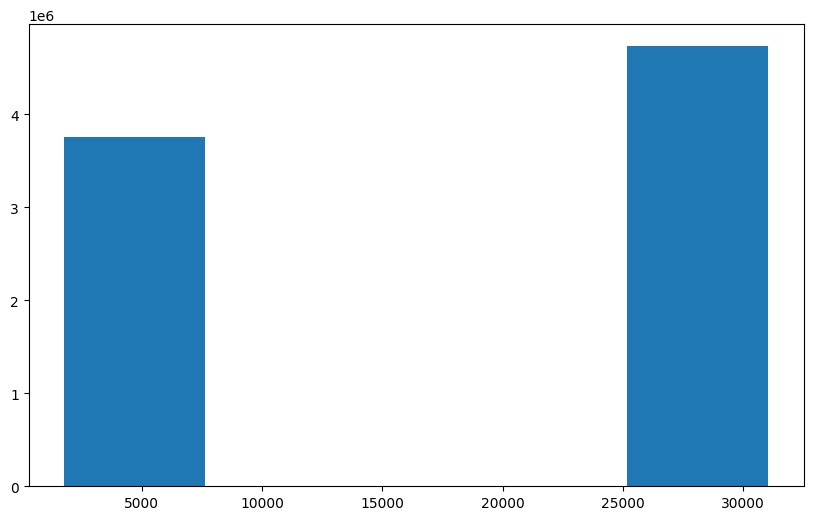

In [13]:
# plot price distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(real_df["price"], bins=5)

In [14]:
# split data by currency pair
grouped = real_df.groupby('currency_pair')

# access data for specific group
price_eth = grouped.get_group('eth-usd')
price_btc = grouped.get_group('btc-usd')

In [15]:
# Using price_eth and price_btc tables
# Extract relevant price column

currency_eth_prices = price_eth['price']
currency_btc_prices = price_btc['price']


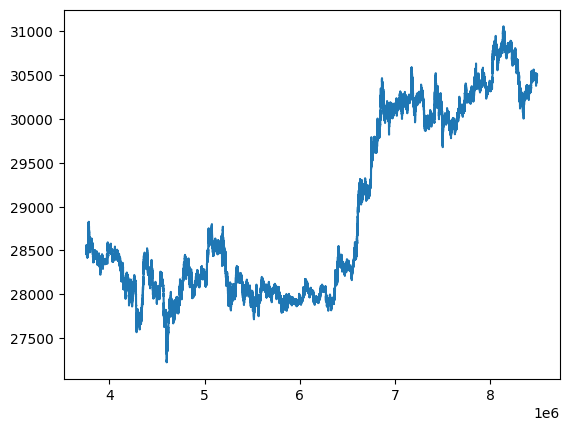

In [16]:
# plot price per currency pair

import matplotlib.pyplot as plt

plt.plot(currency_btc_prices)